Initial dataset head:
      date  noeggs  temperature  age  weather  breed
0  8/21/23     103         29.0  5.0      NaN    NaN
1  8/22/23     121         28.5  NaN      NaN    NaN
2  8/23/23     141         29.5  NaN      NaN    NaN
3  8/24/23     161         29.0  NaN      NaN    NaN
4  8/25/23     174         29.5  NaN      NaN    NaN
Initial dataset shape:
(327, 6)
Dataset head after removing commas:
      date  noeggs  temperature  age  weather  breed
0  8/21/23   103.0         29.0  5.0      NaN    NaN
1  8/22/23   121.0         28.5  NaN      NaN    NaN
2  8/23/23   141.0         29.5  NaN      NaN    NaN
3  8/24/23   161.0         29.0  NaN      NaN    NaN
4  8/25/23   174.0         29.5  NaN      NaN    NaN
Dataset head after creating lag feature:
      date  noeggs  temperature  age  weather  breed  lag_1
0  8/21/23   103.0         29.0  5.0      NaN    NaN    NaN
1  8/22/23   121.0         28.5  NaN      NaN    NaN  103.0
2  8/23/23   141.0         29.5  NaN      NaN    NaN 

C:\Users\acer\AppData\Local\Temp\ipykernel_10748\2529571848.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3476
Epoch 2/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135
Epoch 3/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.0106
Epoch 4/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0041
Epoch 5/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0033
Epoch 6/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.0025
Epoch 7/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.0015
Epoch 8/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0012 
Epoch 9/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0013
Epoch 10/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 8.0965e-04
Epoch 11/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 7.7772e-04
Epoch 12/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.0010
Epoch 13/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0010
Epoch 14/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0011
Epoch 15/50
261/261 ━━━━━━━━━━━━━━━

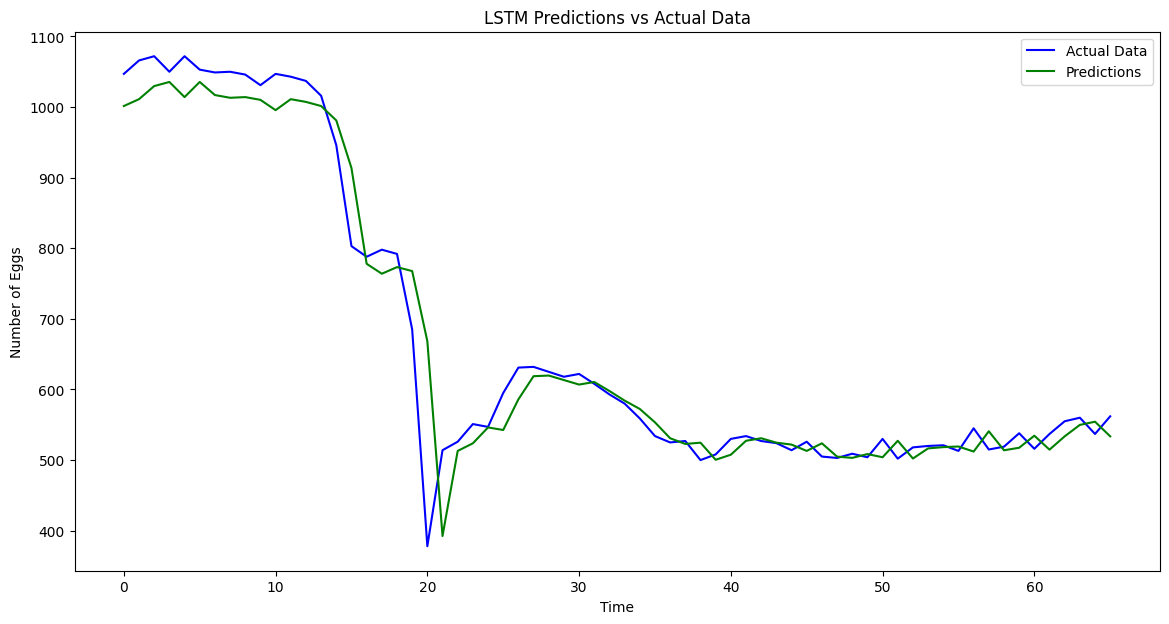

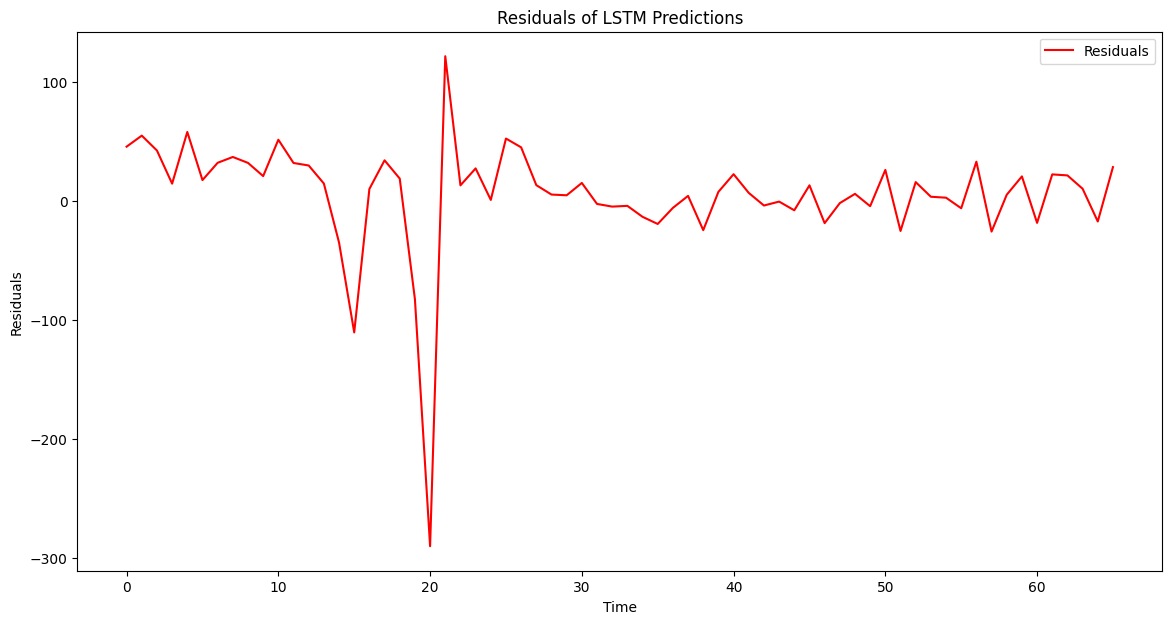

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and prepare your dataset
file_path = r'C:\Users\acer\Desktop\jupyter\DATA-OF-EGGS.csv'
df = pd.read_csv(file_path)

# Print initial dataset information
print("Initial dataset head:")
print(df.head())
print("Initial dataset shape:")
print(df.shape)

# Ensure the column is in string format, remove commas, and convert to float
df['noeggs'] = df['noeggs'].astype(str).str.replace(',', '').astype(float)

# Print dataset after removing commas
print("Dataset head after removing commas:")
print(df.head())

# Create a lag feature (for simplicity, we'll use lag of 1)
df['lag_1'] = df['noeggs'].shift(1)

# Print dataset after creating lag feature
print("Dataset head after creating lag feature:")
print(df.head())

# Fill NaNs in the lag column with forward fill or backward fill
df.fillna(method='bfill', inplace=True)

# Print dataset shape after handling missing values
print("Dataset shape after handling missing values:")
print(df.shape)

# Define features and target
X = df[['lag_1']].values
y = df['noeggs'].values

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

# Reshape the input to be [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=1, verbose=1)

# Generate predictions
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler.inverse_transform(predictions_scaled)  # Inverse transform to original scale
y_test_original = scaler.inverse_transform(y_test_scaled)  # Inverse transform to original scale

# Calculate performance metrics
mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Calculate residuals
residuals = y_test_original - predictions

# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Data', color='blue')
plt.plot(predictions, label='Predictions', color='green')
plt.legend()
plt.title('LSTM Predictions vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Number of Eggs')
plt.show()

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residuals of LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Residuals')  # Fixed unterminated string literal
plt.legend()
plt.show()
